# K nearest neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x, y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h: X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1. Read the problem statement.

2. Get the dataset.

3. Explore the dataset.

4. Pre-processing of dataset.

5. Visualization

6. Transform the dataset for building machine learning model.

7. Split data into train, test set.

8. Build Model.

9. Apply the model.

10. Evaluate the model.

11. Finding Optimal K value

12. Repeat 7, 8, 9 steps.

# Breast cancer dataset

## Read data

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Question 1
Read the data given in bc2.csv file

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import seaborn as sns

In [3]:
bc2 = pd.read_csv("bc2.csv")

## Data preprocessing

### Question 2
Observe the no.of records in dataset and type of each column

In [4]:
print(bc2.shape)
bc2.dtypes

(699, 11)


ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

### Question 3
Use summary statistics to check if missing values, outlier and encoding treament is necessary

Hint: use **describe()**

In [5]:
bc2.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


#### Check Missing Values

In [6]:
bc2.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

### Question 4
#### Check how many `?` are there in Bare Nuclei feature (they are also unknown or missing values). 

In [7]:
mark = bc2[bc2["Bare Nuclei"]=="?"]
mark
mark.shape

(16, 11)

#### Replace them with the 'top' value of the describe function of Bare Nuclei feature

Hint: give value of parameter include='all' in describe function

In [8]:
bc2['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [9]:
#import statistics as st

#bc2['Bare Nuclei']=bc2['Bare Nuclei'].str.replace("?",st.mode(bc2['Bare Nuclei']))

In [10]:
top_val = bc2['Bare Nuclei'].describe(include="all").top
bc2['Bare Nuclei'] = bc2['Bare Nuclei'].replace(to_replace ="?", value = top_val)
bc2['Bare Nuclei']

0       1
1      10
2       2
3       4
4       1
5      10
6      10
7       1
8       1
9       1
10      1
11      1
12      3
13      3
14      9
15      1
16      1
17      1
18     10
19      1
20     10
21      7
22      1
23      1
24      1
25      7
26      1
27      1
28      1
29      1
       ..
669     5
670     8
671     1
672     1
673     1
674     1
675     1
676     1
677     1
678     1
679     1
680    10
681    10
682     1
683     1
684     1
685     1
686     1
687     1
688     1
689     1
690     1
691     5
692     1
693     1
694     2
695     1
696     3
697     4
698     5
Name: Bare Nuclei, Length: 699, dtype: object

### Question 5
#### Find the distribution of target variable (Class) 

In [11]:
bc2['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

#### Plot the distribution of target variable using histogram

(array([458.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 241.]),
 array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <a list of 10 Patch objects>)

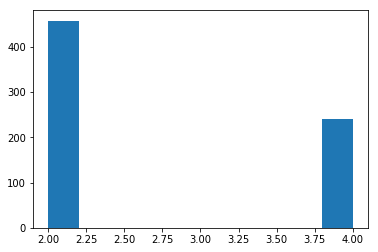

In [12]:
plt.hist(bc2['Class'])

#### Convert the datatype of Bare Nuclei to `int`

In [13]:
bc2["Bare Nuclei"] = bc2["Bare Nuclei"].astype(int)


## Scatter plot

### Question 6
Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them.

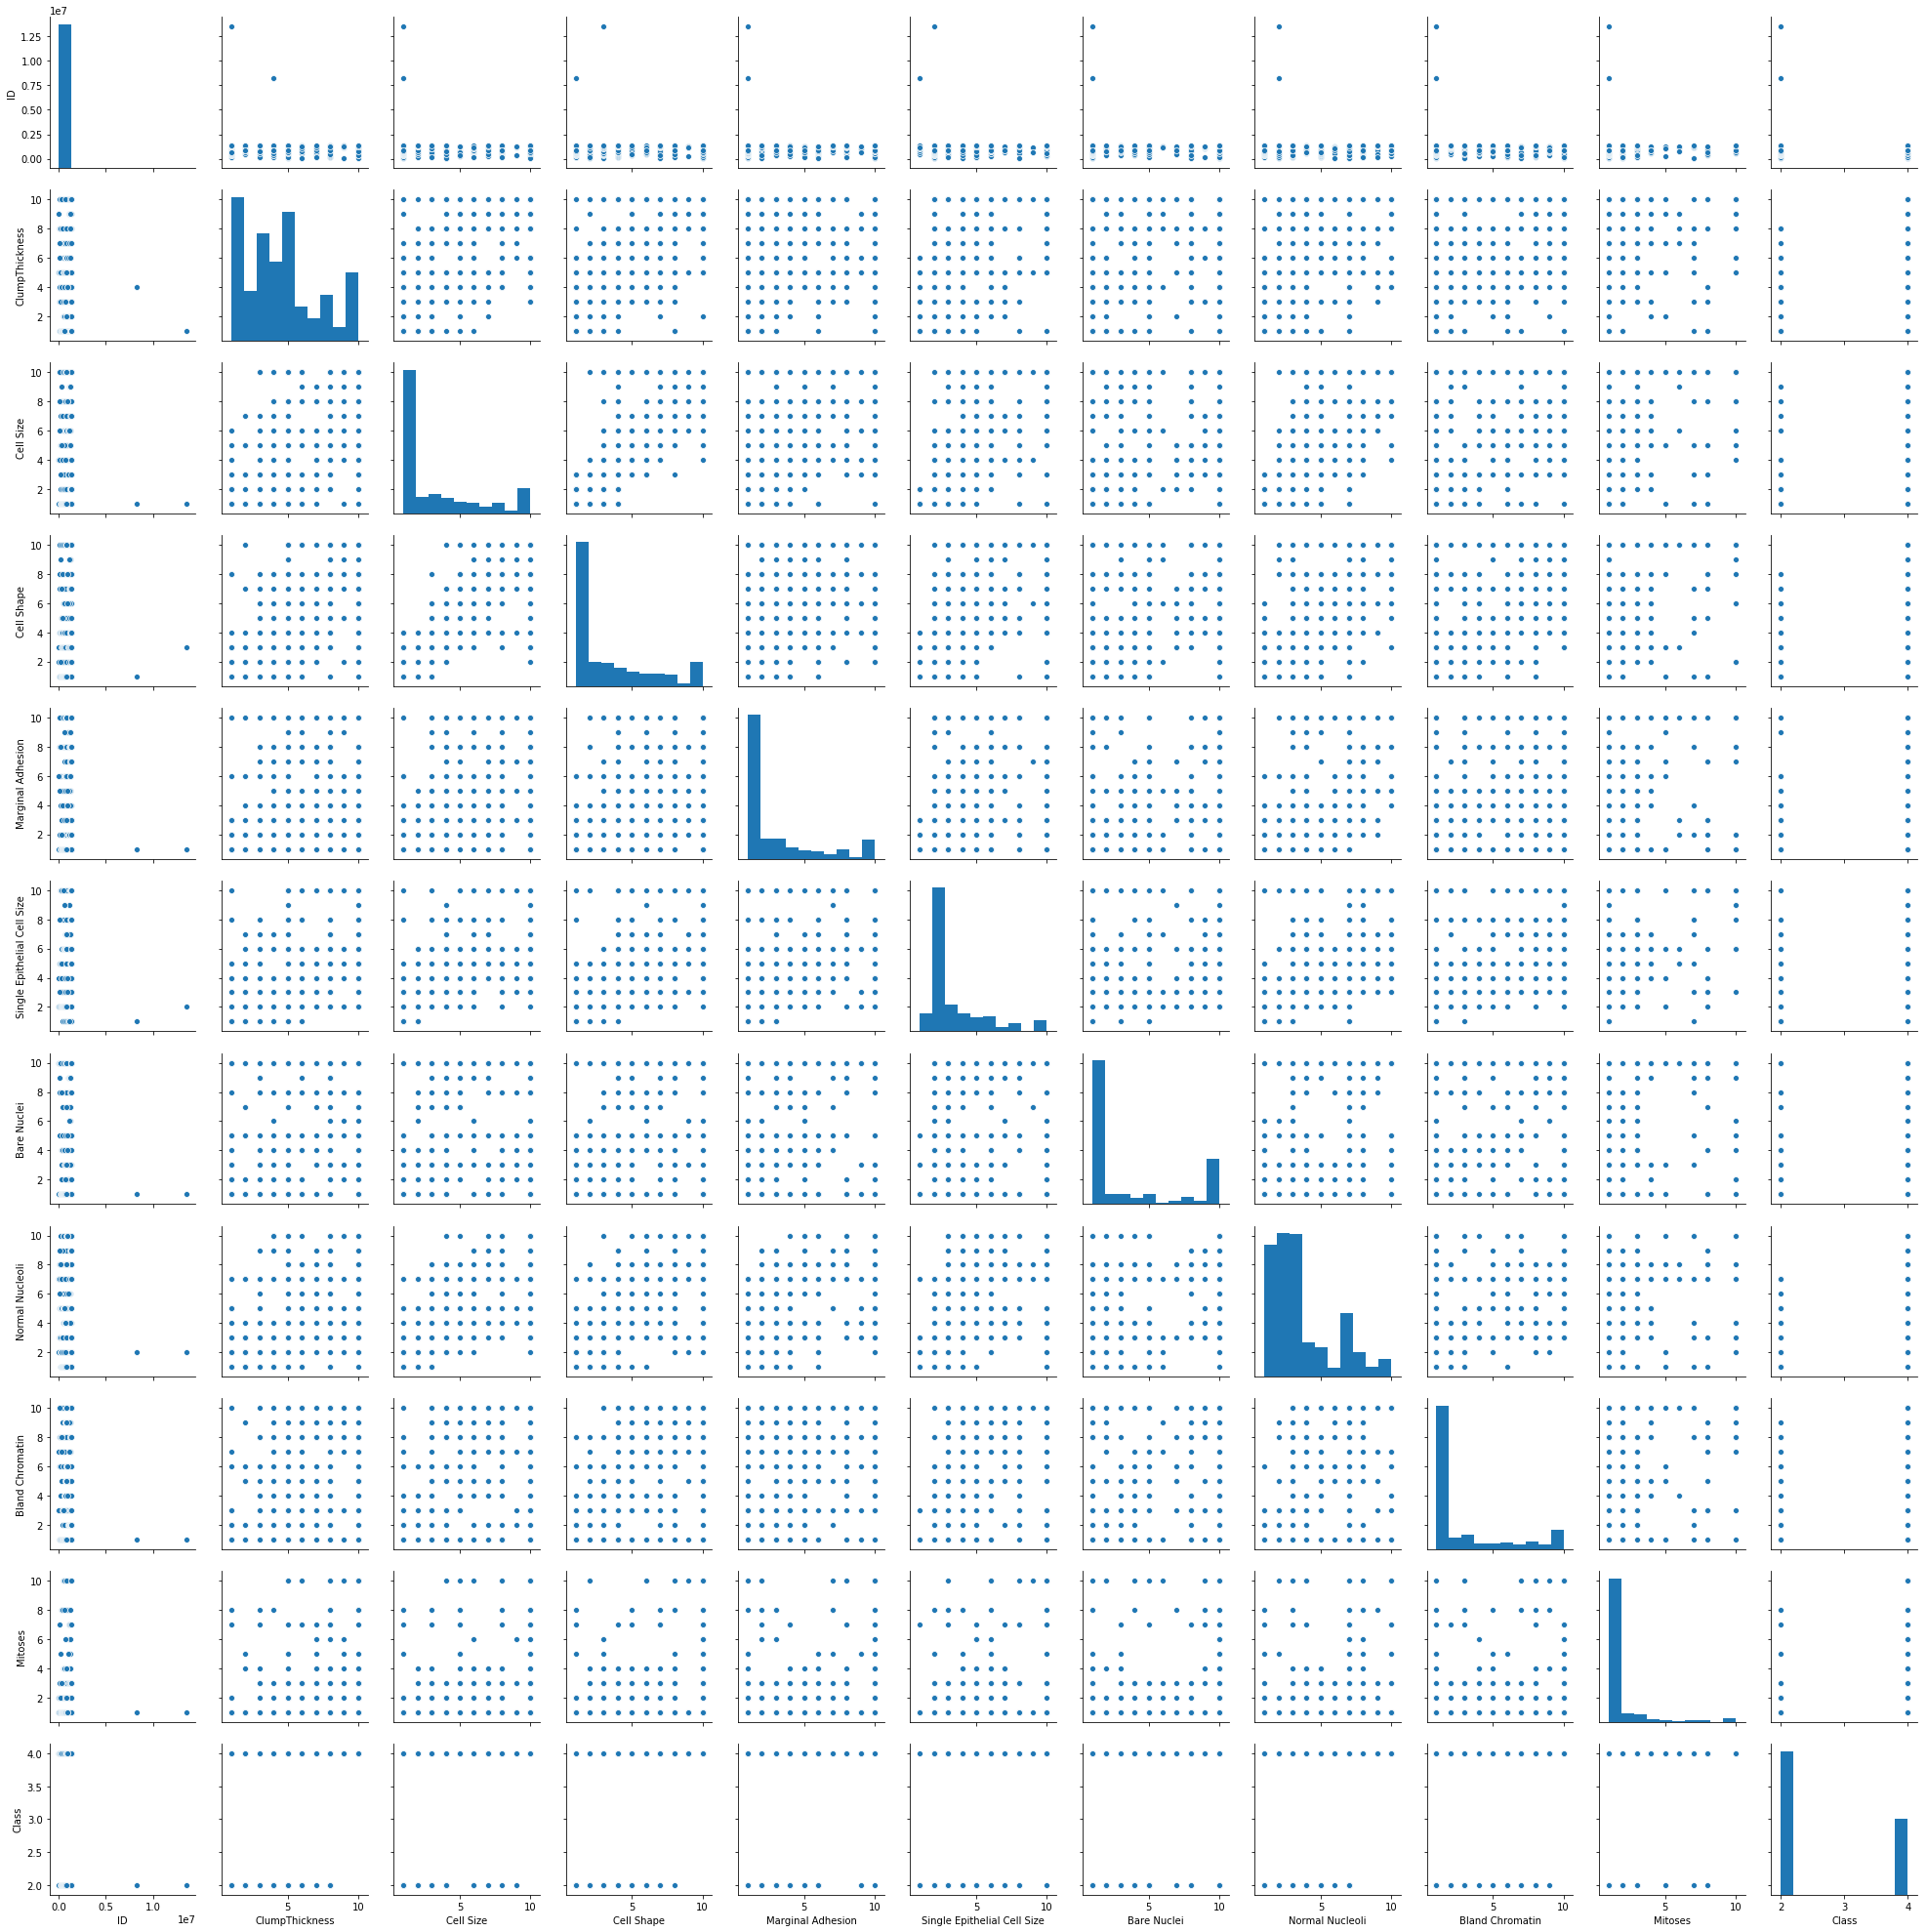

In [14]:
sns.pairplot(data=bc2)

In [15]:
bc2.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.092533,-0.060051,-0.052072,-0.034901,-0.080226
ClumpThickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,-0.092533,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Normal Nucleoli,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170


In [16]:
#columns which are collinear: cell size, cell shape
#column id has no use so to reduce the dataset, it should be deleted

bc2=bc2.drop(columns=['Cell Size', 'ID'])

In [17]:
bc2.head()

,ClumpThickness,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,2,1,3,1,1,2
1,5,4,5,7,10,3,2,1,2
2,3,1,1,2,2,3,1,1,2
3,6,8,1,3,4,3,7,1,2
4,4,1,3,2,1,3,1,1,2


## Train test split

### Question 7
#### Divide the dataset into feature set and target set

In [18]:
bc2.columns
x=bc2.drop('Class',axis=1) #Feature
y=bc2['Class']   #Target

#### Divide the Training and Test sets in 70:30 

In [19]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=2222)  

## Scale the data

### Question 8
Standardize the data

Hint: use **StandardScaler()**

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)

C:\Users\Shweta\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Shweta\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\Shweta\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  """


## Build Model

### Question 9

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

#accuracy score for k =3
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=3)  
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

#accuracy score for k =5 
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

#accuracy score for k =9  
classifier = KNeighborsClassifier(n_neighbors=9)  
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9571428571428572
0.9619047619047619
0.9619047619047619


C:\Users\Shweta\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Shweta\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  
C:\Users\Shweta\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  import sys


## Find optimal value of K

### Question 10
Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

In [22]:
data=pd.DataFrame([])
for i in range (1,21,2):
    classifier = KNeighborsClassifier(n_neighbors=i)  
    classifier.fit(X_train, y_train) 
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy score for n = ", i, " is ", accuracy_score(y_test, y_pred))
    data = data.append(pd.DataFrame({'n': i, 'Accuracy': acc}, index=[0]), ignore_index=True)
    
print()
data_sorted = data.sort_values(by='Accuracy', ascending=False) 
data_sorted.reset_index(drop=True)
opt_n = data_sorted.iloc[0,0]
print("optimal number of neighbours: ", opt_n)

Accuracy score for n =  1  is  0.9619047619047619
Accuracy score for n =  3  is  0.9571428571428572
Accuracy score for n =  5  is  0.9619047619047619
Accuracy score for n =  7  is  0.9619047619047619
Accuracy score for n =  9  is  0.9619047619047619
Accuracy score for n =  11  is  0.9619047619047619
Accuracy score for n =  13  is  0.9666666666666667
Accuracy score for n =  15  is  0.9666666666666667
Accuracy score for n =  17  is  0.9714285714285714
Accuracy score for n =  19  is  0.9714285714285714

optimal number of neighbours:  17


## Plot accuracy

### Question 11

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

In [23]:
data_1=pd.DataFrame([])
for i in range (1,50):
    classifier = KNeighborsClassifier(n_neighbors=i)  
    classifier.fit(X_train, y_train) 
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    data_1 = data_1.append(pd.DataFrame({'n': i, 'Accuracy': acc}, index=[0]), ignore_index=True)



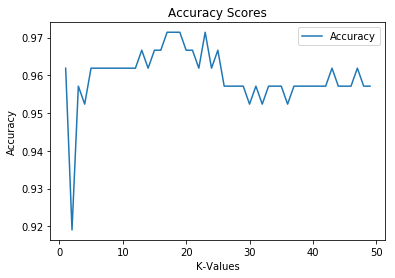

In [24]:
plt.title('Accuracy Scores')
plt.plot(data_1['n'], data_1['Accuracy'], label = 'Accuracy')
plt.legend()
plt.xlabel('K-Values')
plt.ylabel('Accuracy')
plt.show()